In [3]:
import pandas as pd

In [4]:
import json
data = []
with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        data.append(json.loads(line))

df = pd.DataFrame(data)

In [ ]:
# Following for reading WA state data only, but not useful now

""" 
import json
import pandas as pd

data = []

with open('yelp_academic_dataset_business.json', 'r') as file:
    for line in file:
        business = json.loads(line)
        if business['state'] == 'WA':  # Check if 'State' is 'WA'
            data.append(business)

df = pd.DataFrame(data)
"""

In [5]:
df_sb = df[df["city"] == 'Santa Barbara']

In [8]:
import numpy as np 

# Downtown SB location: 34.4235° N, 119.7035° W

df_sb['distance'] = np.sqrt((df_sb['latitude'] - 34.4235) **2 + (df_sb['longitude']+119.7035) ** 2)


/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_7175/3651767811.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb['distance'] = np.sqrt((df_sb['latitude'] - 34.4235) **2 + (df_sb['longitude']+119.7035) ** 2)


In [9]:
df_sb

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,distance
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None,0.008327
26,noByYNtDLQAra9ccqxdfDw,H&M,827-833 State St,Santa Barbara,CA,93101,34.420209,-119.700460,3.0,24,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Women's Clothing, Accessories, Children's Clot...","{'Monday': '11:0-18:0', 'Tuesday': '11:0-18:0'...",0.004480
85,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,4.0,389,1,"{'RestaurantsTakeOut': 'True', 'NoiseLevel': '...","Food, Restaurants, Salad, Coffee & Tea, Breakf...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-14:0', '...",0.015702
91,nUqrF-h9S7myCcvNDecOvw,Iron Horse Auto Body,825 Cacique St,Santa Barbara,CA,93103,34.419620,-119.677032,4.5,32,1,"{'BusinessAcceptsCreditCards': 'True', 'WiFi':...","Towing, Automotive, Body Shops","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",0.026751
120,bYjnX_J1bHZob10DoSFkqQ,Tinkle Belle Diaper Service,,Santa Barbara,CA,93101,34.420334,-119.710749,5.0,17,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Parenting Classes, Maternity Wear, Fashion, Ed...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ...",0.007911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150239,TSwMwVq5GtQh5LW2t32uGA,Woody's Roundup Bar & Grill,"Earl Warren Showgrounds, 3400 Calle Real",Santa Barbara,CA,93105,34.430895,-119.735645,2.0,6,0,"{'Caters': 'True', 'BusinessParking': '{'garag...","Barbeque, Bars, Restaurants, Nightlife",None,0.032985
150264,Bo-GGwQNcLVwyKeYkbfAYg,Vino Divino,2012 De La Vina St,Santa Barbara,CA,93105,34.429154,-119.717222,5.0,19,1,"{'BusinessParking': '{'garage': False, 'street...","Event Planning & Services, Wine Tasting Room, ...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-18:0', ...",0.014842
150284,f7rTfTv6dwO-ovKhz-Rvgw,"Joanne & Tem Gronquist, OD","1805 State St, Ste B",Santa Barbara,CA,93101,34.428995,-119.712718,4.5,15,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Shopping, Eyewear & Opticians, Health & Medica...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-17:0', '...",0.010731
150290,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,0,"{'NoiseLevel': 'u'average'', 'RestaurantsGoodF...","Restaurants, Pizza, Food","{'Monday': '15:0-21:0', 'Tuesday': '15:0-21:0'...",0.040056


Text(0.5, 1.0, 'Stars vs DIstance to downtown')

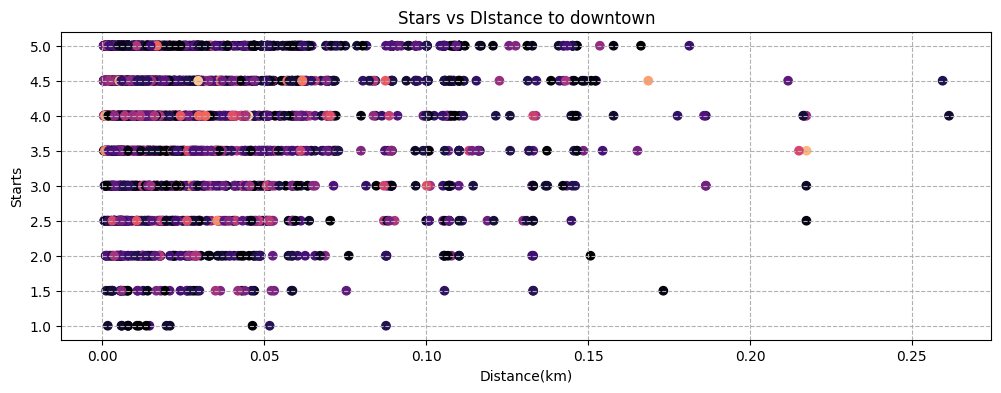

In [24]:
import matplotlib.pyplot as plt

df_sb.sort_values(by='review_count')
plt.figure(figsize=(12, 4))
plt.grid(True, linestyle='--')


plt.ylabel('Starts')
plt.xlabel('Distance(km)')
plt.scatter( df_sb['distance'] , df_sb['stars'],  c=  np.log((df_sb['review_count'] / np.max(df_sb['review_count']))), cmap='magma', facecolor='#E1E1E1')
plt.title('Stars vs DIstance to downtown')


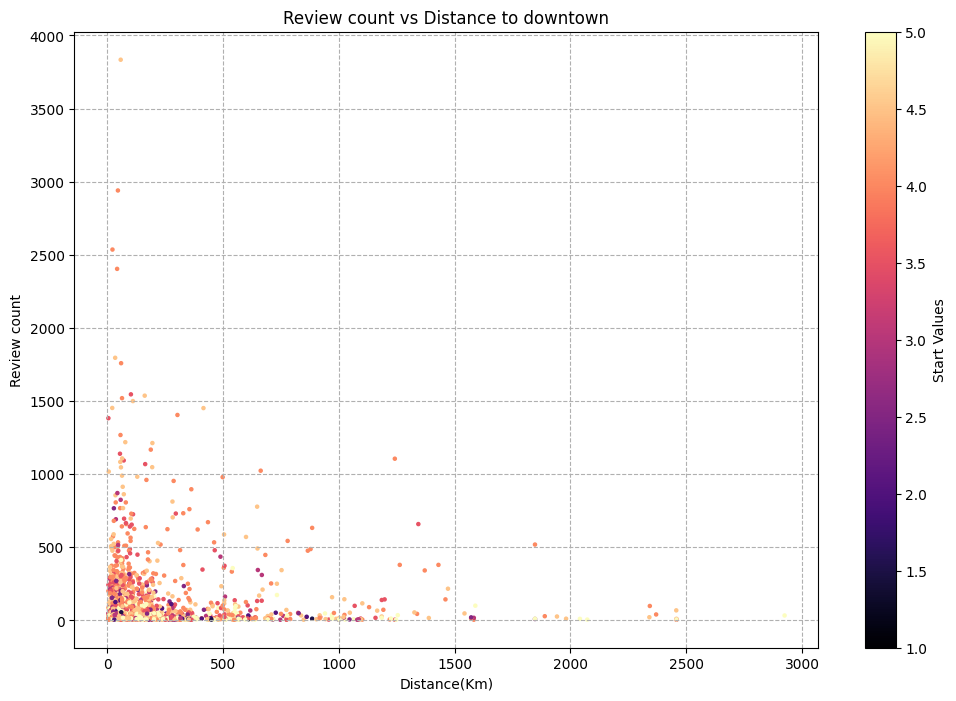

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

som = 1 / df_sb['distance']
plt.ylabel('Review count')
plt.xlabel('Distance(Km)')
plt.title('Review count vs Distance to downtown')
plt.grid(True, linestyle='--')

plt.scatter(som, df_sb['review_count'] , c=df_sb['stars'], cmap='magma', s=5, facecolor='E1E1E1')

# Add a color bar to show the mapping of stars to colors
color_bar = plt.colorbar()
color_bar.set_label('Start Values')

plt.show()

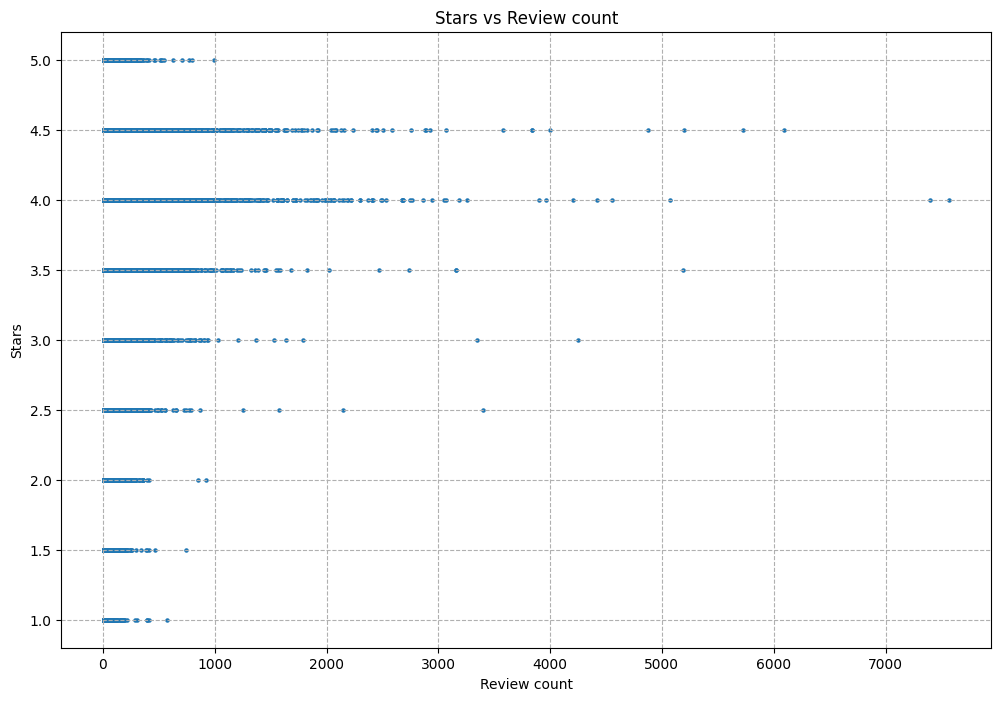

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.ylabel('Stars')
plt.xlabel('Review count')
plt.title('Stars vs Review count')
plt.grid(True, linestyle='--')

plt.scatter( df['review_count'], df['stars'], s=5)


plt.show()

In [21]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


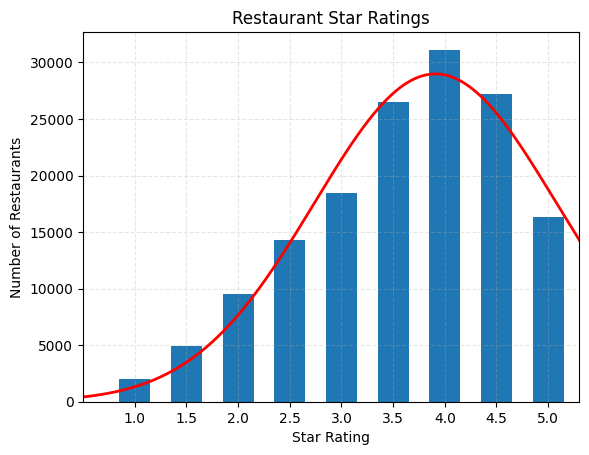

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

star_counts = df['stars'].value_counts().sort_index()


params, covariance = curve_fit(gaussian, star_counts.index, star_counts.values)
A_fit, mu_fit, sigma_fit = params

x_fit = np.linspace(0, 6, 1000)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

plt.grid(True, linestyle='--',  alpha=0.3)

plt.plot(x_fit, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
plt.bar(star_counts.index, star_counts.values, tick_label=star_counts.index, width=0.3, align='center')
plt.xlim(0.5, 5.3)
plt.xlabel('Star Rating')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Star Ratings')
plt.show()


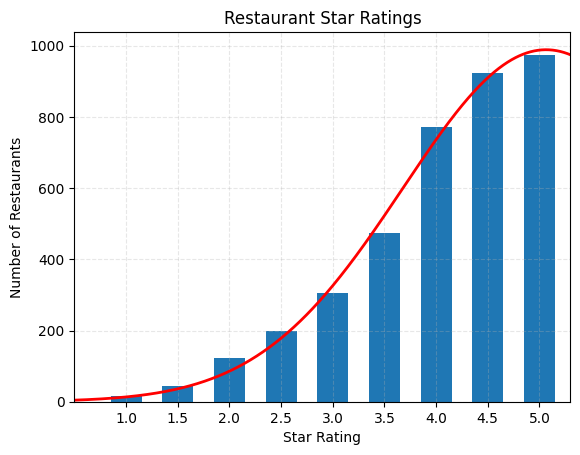

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

star_counts = df_sb['stars'].value_counts().sort_index()


params, covariance = curve_fit(gaussian, star_counts.index, star_counts.values)
A_fit, mu_fit, sigma_fit = params

x_fit = np.linspace(0, 6, 1000)
y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)

plt.grid(True, linestyle='--',  alpha=0.3)

plt.plot(x_fit, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
plt.bar(star_counts.index, star_counts.values, tick_label=star_counts.index, width=0.3, align='center')
plt.xlim(0.5, 5.3)
plt.xlabel('Star Rating')
plt.ylabel('Number of Restaurants')
plt.title('Restaurant Star Ratings')
plt.show()


/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_7175/694449737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb['distance_km'] = df_sb['distance'] * 111


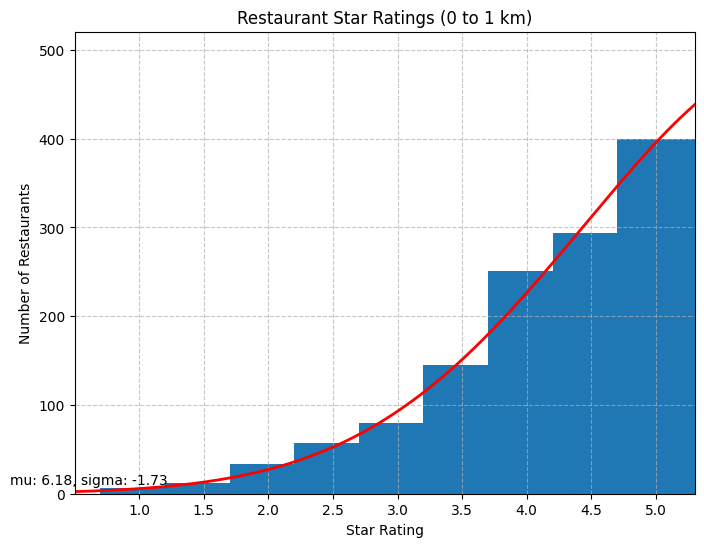

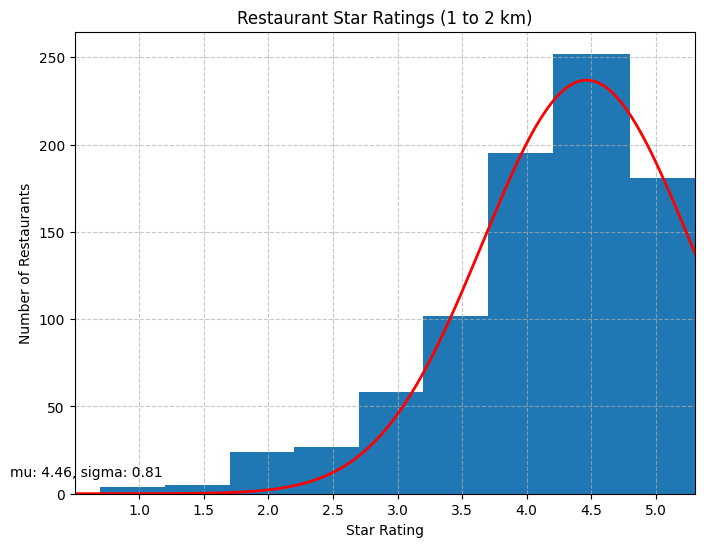

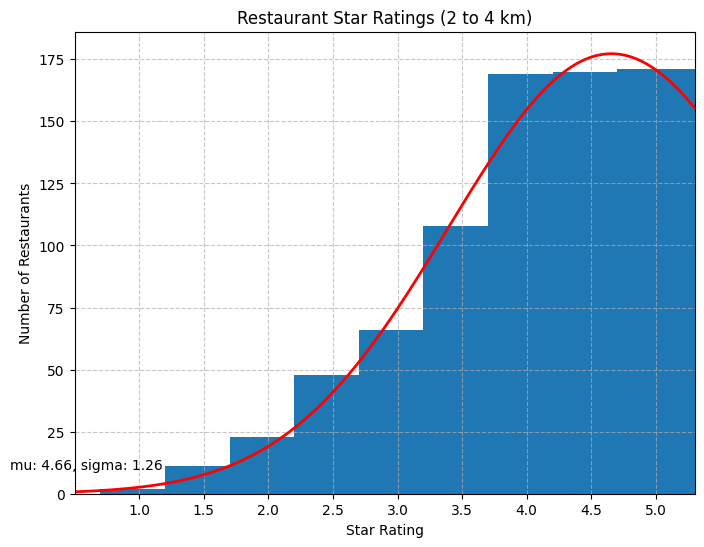

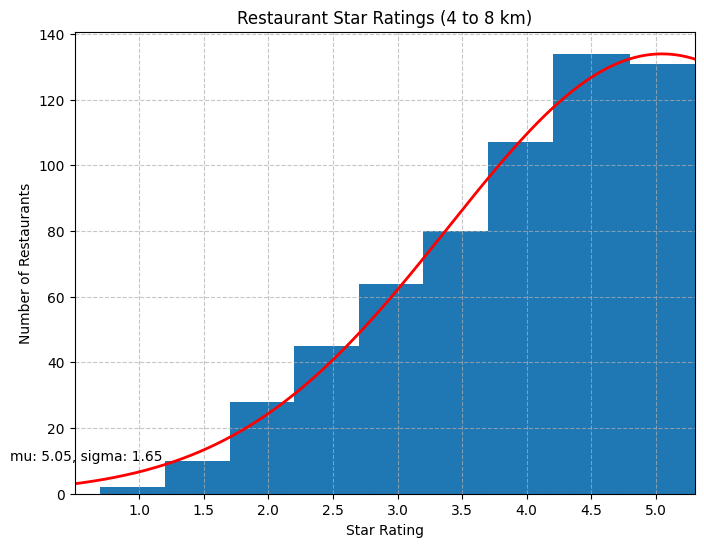

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [48]:
distance_slices = [0,1,2,4,8,16,100]
df_sb['distance_km'] = df_sb['distance'] * 111

# Loop through distance slices
for i in range(len(distance_slices) - 1):
    # Define the current distance range
    min_distance = distance_slices[i]
    max_distance = distance_slices[i + 1]
    
    # Filter the DataFrame for the current distance range
    filtered_df = df_sb[(df_sb['distance_km'] >= min_distance) & (df_sb['distance_km'] < max_distance)]
    
    # Count the number of restaurants for each star rating in the filtered DataFrame
    star_counts = filtered_df['stars'].value_counts().sort_index()
    
    params, covariance = curve_fit(gaussian, star_counts.index, star_counts.values)
    A_fit, mu_fit, sigma_fit = params

    x_fit = np.linspace(0, 6, 1000)
    y_fit = gaussian(x_fit, A_fit, mu_fit, sigma_fit)


    plt.figure(figsize=(8, 6))
    plt.bar(star_counts.index, star_counts.values, tick_label=star_counts.index, width=0.6, align='center')
    plt.plot(x_fit, y_fit, 'r-', label='Fitted Gaussian', linewidth=2)
    plt.xlim(0.5, 5.3)
    plt.xlabel('Star Rating')
    plt.ylabel('Number of Restaurants')
    plt.title(f'Restaurant Star Ratings ({min_distance} to {max_distance} km)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.text(0, 10, f'mu: {mu_fit:.2f}, sigma: {sigma_fit:.2f}')
    plt.show()


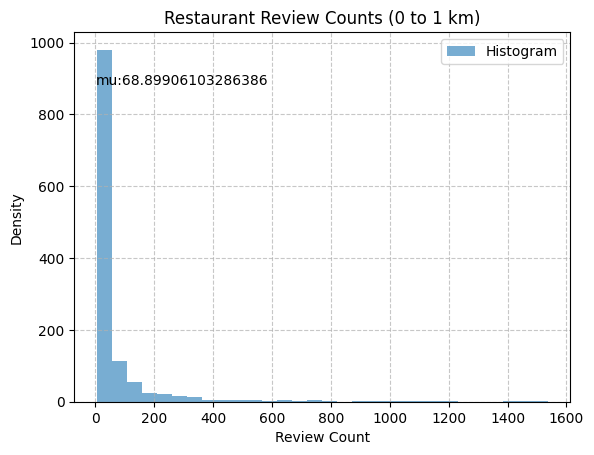

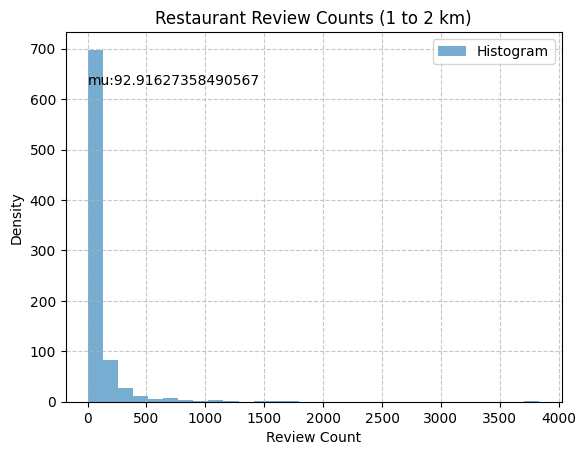

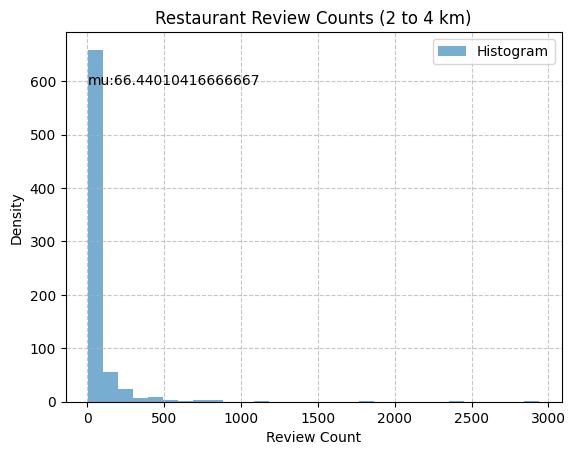

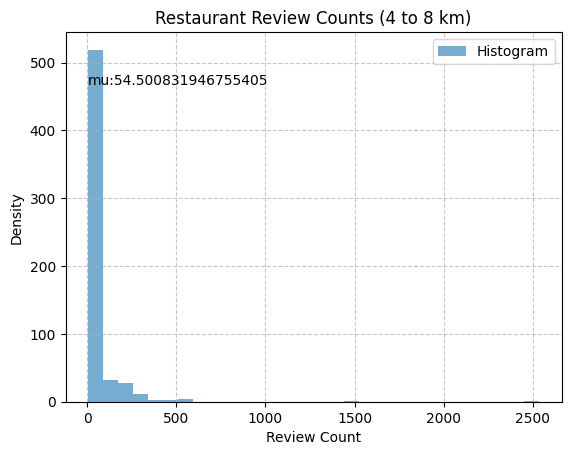

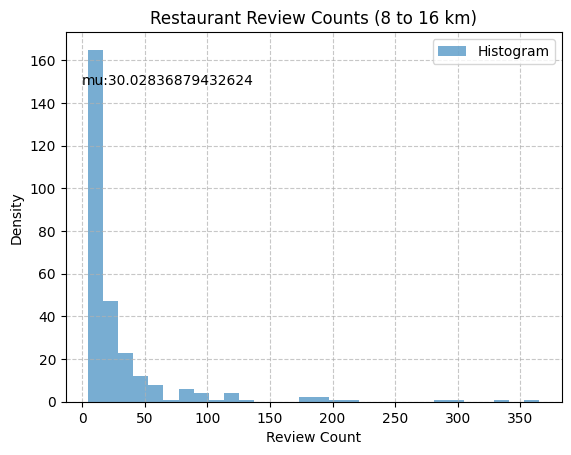

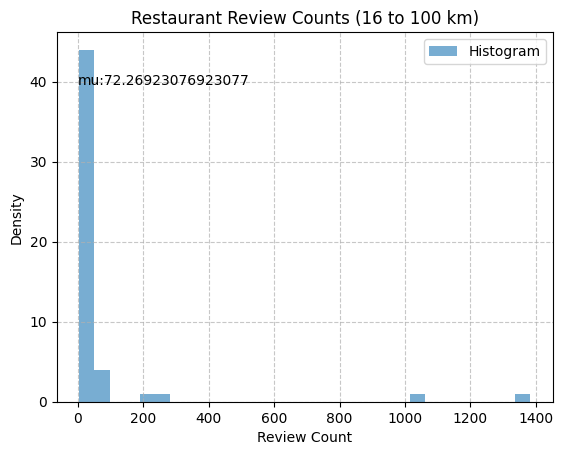

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Loop through distance slices
for i in range(len(distance_slices) - 1):
    # Define the current distance range
    min_distance = distance_slices[i]
    max_distance = distance_slices[i + 1]
    
    # Filter the DataFrame for the current distance range
    filtered_df = df_sb[(df_sb['distance_km'] >= min_distance) & (df_sb['distance_km'] < max_distance)]
    
    # Histogram of review counts in the filtered DataFrame
    n, bins, _ = plt.hist(filtered_df['review_count'], bins=30, alpha=0.6, label='Histogram')
    mean = np.mean(filtered_df['review_count'])
    
    plt.xlabel('Review Count')
    plt.ylabel('Density')
    plt.title(f'Restaurant Review Counts ({min_distance} to {max_distance} km)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.text(min(x_fit), max(n)*0.9, f'mu:{mean}')
    plt.legend()
    plt.show()


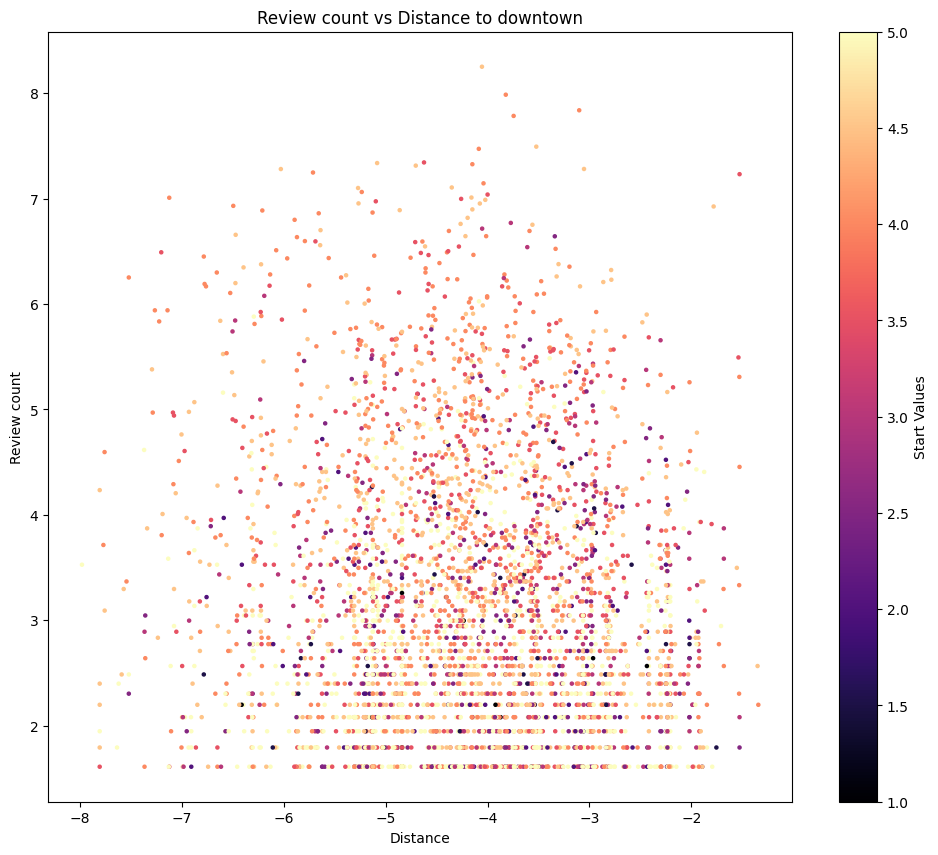

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

plt.ylabel('Review count')
plt.xlabel('Distance')
plt.title('Review count vs Distance to downtown')

plt.scatter( np.log(df_sb['distance']) , np.log(df_sb['review_count']) , c=df_sb['stars'], cmap='magma', s=5)


# Add a color bar to show the mapping of values to colors
color_bar = plt.colorbar()
color_bar.set_label('Start Values')

plt.show()

Text(0.5, 1.0, 'Stars vs DIstance to downtown')

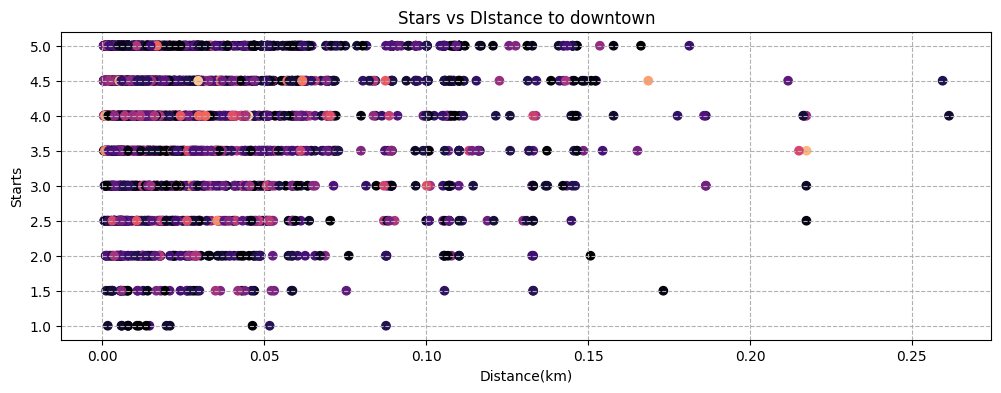

In [53]:
import matplotlib.pyplot as plt

df_closer.sort_values(by='review_count')
plt.figure(figsize=(12, 4))
plt.grid(True, linestyle='--')


plt.ylabel('Starts')
plt.xlabel('Distance(km)')
plt.scatter( df_sb['distance'] , df_sb['stars'],  c=  np.log((df_sb['review_count'] / np.max(df_sb['review_count']))), cmap='magma', facecolor='#E1E1E1')
plt.title('Stars vs DIstance to downtown')

In [56]:
distance_slices = [0,1,2,4,8,16,100]
df_sb['distance_km'] = df_sb['distance'] * 111

# Loop through distance slices
for i in range(len(distance_slices) - 1):
    # Define the current distance range
    min_distance = distance_slices[i]
    max_distance = distance_slices[i + 1]
    
    # Filter the DataFrame for the current distance range
    filtered_df = df_sb[(df_sb['distance_km'] >= min_distance) & (df_sb['distance_km'] < max_distance)]
    
    print(np.mean( filtered_df['review_count']))

68.89906103286386
92.91627358490567
66.44010416666667
54.500831946755405
30.02836879432624
72.26923076923077


/var/folders/tp/1bsthy355yj6qlmh5ym1996w0000gn/T/ipykernel_7175/1996083676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sb['distance_km'] = df_sb['distance'] * 111
